# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** Karol Ożóg, AGH, WEAIiIB, 2. rok, CWL 6.

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [5]:
 #!python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [ ]:
def spare_matrix_Abt(m,n):
    t= np.linspace(0,1,m)
    b=np.cos(4*t)
    A=np.vander(t,N=n, increasing=True)
   
    return (A,b)

print(spare_matrix_Abt(4,5))



(array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.33333333, 0.11111111, 0.03703704, 0.01234568],
       [1.        , 0.66666667, 0.44444444, 0.2962963 , 0.19753086],
       [1.        , 1.        , 1.        , 1.        , 1.        ]]), array([ 1.        ,  0.23523757, -0.88932657, -0.65364362]))


***Analiza i wykoananie zad. 1***

Zadanie 1. polegało na utworzeniu funkcji generującą macierz $A$ - wedle wersji przedstawionej w tresci zadania i wektor $b$ - ktorego wartosci sa dane przez funkcje $\cos 4t$. W tym celu najpierw tworzymy wektor $t$ o wartosciach z przedzialu 0 do 1 o wymiarze $m$. Następnie korzystając z funkcji *np.cos(4t)* tworzymy wektro $b$. Następnie korzystając z funkcji *np.vander* tworzmy zadaną macierz podając jako argumnety: nasz wektor $t$ o wymiarze $m$, jaka ma być liczba wierszy $n$, oraz zeby macierz była rosnąca kolumonwo. Jak widać korzystajac z funkcji *np.vander* można w łatwy sposób utworzyć zadną macierz.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [ ]:
# ===== Twoja implementacja tutaj =====

def residual_norm(A:np.ndarray,x:np.ndarray, b:np.ndarray):
    if not isinstance(A, np.ndarray) or not isinstance(x, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    try:
        r=b-A.dot(x)
        norm=np.linalg.norm(r)
        return norm
    except ValueError:
        return None

def square_from_rectan(A,b):
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    if A.ndim != 2 or b.ndim != 1:
        return None
    if A.shape[0] != b.shape[0]:
        return None
    if A.size == 0:
        return None

    At=np.transpose(A)
    kwadr=np.dot(At,A)
    Atb=np.dot(At,b)
    return(kwadr,Atb)

norm =[]
time=[]
memory=[]

(A,b)=spare_matrix_Abt(50,12)

(AtA,Atb)=square_from_rectan(A,b)
x1=np.linalg.solve(AtA,Atb)
norm.append(residual_norm(A,x1,b))
t1= %timeit -r 3 -n 3 -o np.linalg.solve(AtA,Atb)
time.append(t1)
mem1 = %memit -o np.linalg.solve(AtA,Atb)
memory.append(mem1)

(x2,__,___,____)=np.linalg.lstsq(A,b)
norm.append(residual_norm(A,x2,b))
t2= %timeit -r 3 -n 3 -o np.linalg.lstsq(A,b)
time.append(t2)
mem2 = %memit -o np.linalg.lstsq(A,b)
memory.append(mem2)

Q,R=np.linalg.qr(A)
Qt=Q.T
x3=sp.linalg.solve_triangular(R,Qt.dot(b))

norm.append(residual_norm(A,x3,b))
t3= %timeit -r 3 -n 3 -o sp.linalg.solve_triangular(R,Qt.dot(b))
time.append(t3)
mem3 = %memit -o sp.linalg.solve_triangular(R,Qt.dot(b))
memory.append(mem3)


U, S, V = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)
x4 = V.T @ np.linalg.solve(S, U.T @ b)

norm.append(residual_norm(A,x4,b))
t4= %timeit -r 3 -n 3 -o V.T @ np.linalg.solve(S, U.T @ b)

time.append(t4)
mem4 = %memit -o V.T @ np.linalg.solve(S, U.T @ b)
memory.append(mem4)

The slowest run took 5.00 times longer than the fastest. This could mean that an intermediate result is being cached.
33 μs ± 24.2 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
peak memory: 136.68 MiB, increment: 0.06 MiB
50.5 μs ± 24 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
peak memory: 132.82 MiB, increment: 0.00 MiB
20.6 μs ± 10.3 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
peak memory: 132.72 MiB, increment: 0.00 MiB
The slowest run took 4.72 times longer than the fastest. This could mean that an intermediate result is being cached.
38.2 μs ± 29.2 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
peak memory: 132.80 MiB, increment: 0.00 MiB


In [93]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  6.230e-08
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  33 μs ± 24.2 μs per loop (mea
Druga metoda    :  50.5 μs ± 24 μs per loop (mea
Trzecia metoda  :  20.6 μs ± 10.3 μs per loop (m
Czwarta metoda  :  38.2 μs ± 29.2 μs per loop (m

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 136.68 MiB, increment: 0.06 MiB
Druga metoda    :  peak memory: 132.82 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 132.72 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 132.80 MiB, increment: 0.00 MiB


***Analiza i wykoananie zad. 2***

W tym zadaniu najpierw korzystając z poprzednio utworzonej funkcji tworzymy macierz $A$ i wektor $b$ o wymiarach $m$=50, $n$ = 12. Będziemy chcieli rozwiązać równanie macierzowe $Ax=b$ różnymi metodami, przy czym dla każdej metody będziemy sprawdzać jej norme z residuum (wykorzystujac funkcje z poprzdenigo laboratorium), czas wykonani funkcji (korzystająć z %timeit) i użytą pamięć (korzystając z %memit). Sprawdzono następujące metody

1. Metoda ta polega na przekształceniu układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$. W tym celu najpierw tworzymy funkcję *`square_from_rectan()`* w której tworzymy macierze kwadratowe, mnożąc macierzowo wektor $b$ i macierz $A$ przez transponowaną macierz $A^T$. Dzięki wyznaczeniu macierzy kwadratowych znajdujemy rozwiązanie $x$, wykorzystując  funkcję *np.linalg.solve()*.

2. Druga metoda polega na wykorzystaniu wbudowanej funkcji  *np.linalg.lstsq()* służącej do wyznaczenia rozwiązania równania macierzowego dla macierzy nie-kwadratowych. Po wywołaniu tej funkcji otrzymujemy nie tylko rozwiązanie ale również inne parametry jak rząd macierzy, czy residua, których nie użyjemy w tym zadaniu.

3. Metoda ta polega na rozkładzie macierzy metodą QR. Korzystajac z funkcji *np.linalg.qr()* rozkładamy macierz A na macierze $Q$ i $R$, przy czym macierz $Q$ jest macierzaą ortogonalną a R jest maceirzą trójkątną górną. Otrzymujemy równani $Rx=Q^Tb$, które dzięki otrzymaniu macierzy trójkątnej możemy rozwiązać korzystając z funkji [`sp.linalg.solve_triangular()'].

4. Czwarta metoda polega na rozkłądzie metodą SVD, z którą zapoznaliśmy się na ostatnim laboratorium. Korzystając z funkcji *np.linalg.svd()* wyznaczamy macierze $U, S, V$, podając jako argument full_matrices=False aby podana macierz mogla nie byc kwadratową. Rozwiązanie obliczane jest jako: transponowana macierz V przemnożona przez rozwiązanie układu równań składającego się z macierzy diagonalnej i transponowanego wektora U przemnożony przez oryginalny wektor wyrazów wolnych.

Wyniki sprawdzające norme residuum, czas i pamięc pokazują, że: najgorsza pod względem poprawności rozwiązania jest metoda pierwsza, pozostałe są natomiast porównywalne. Najdłuższy czas wykazała metoda 2. natomiast najkrótszy metoda 3. Użyta pamięć jest porównywalna dla wsyzstkich emtod, przy czym pierwsza użyła nieznacznie większy zapas pamięci. Wnioskując z uzyskanych wyników uznano, że najlepszą metodą jest rozkłąd QR.


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [31]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

Błąd dla wydatkow na pozimoie  140  to  17.632190586868063
Błąd dla wydatkow na pozimoie  190  to  17.173155142359064
Błąd dla wydatkow na pozimoie  250  to  35.37768739105172
Błąd dla wydatkow na pozimoie  270  to  39.5613015688553
Błąd dla wydatkow na pozimoie  290  to  3.7449157466589327
Błąd dla wydatkow na pozimoie  310  to  2.0714700755374906
Błąd dla wydatkow na pozimoie  340  to  15.796048808832097
Błąd dla wydatkow na pozimoie  360  to  21.612434631028464
Błąd dla wydatkow na pozimoie  420  to  20.938407902382323
Błąd dla wydatkow na pozimoie  390  to  25.33701336432307
Blad wynios;:  72.37263151206679


Text(0, 0.5, 'dochody')

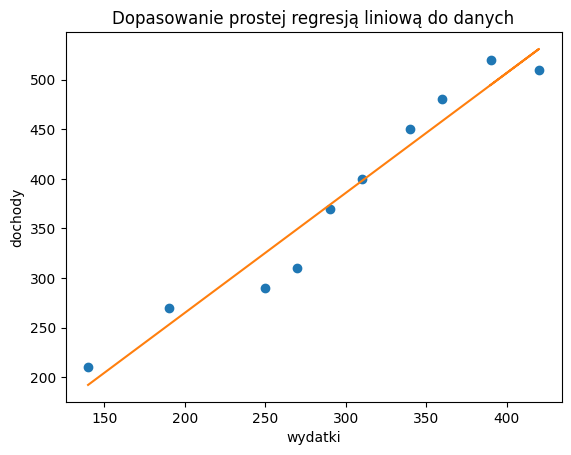

In [ ]:
# ===== Twoja implementacja tutaj =====
# d=aw+b
Sx=0
Sy=0
Sxx=0
Sxy=0
n=len(w)
for i in range(n):
    Sx+=w[i]
    Sy+=d[i]
    Sxx+=w[i]**2
    Sxy+=w[i]*d[i]

a=(n*Sxy-Sx*Sy)/(n*Sxx-Sx**2)
b=(Sy-a*Sx)/n

linia = (a * w) + b
blad=[]
for i in range(n):
    bl=d[i]-linia[i]
    print("Błąd dla wydatkow na pozimoie ",w[i],' to ', abs(bl))
    blad.append(bl)

print("Blad wyniosi: ",np.linalg.norm(blad))

plt.plot(w,d,'o')
plt.plot(w,linia)
plt.title("Dopasowanie prostej regresją liniową do danych")
plt.xlabel('wydatki')
plt.ylabel('dochody')


***Analiza i wykonanie zad.3***

Zadanie polegało na utworzneiu regresji liniowej do danych dochodu i wydatków. Będziemy dopasowywać regresję postaci $d=aw+b*, gdzie $d$ - dochody, $w$ - wydatki, $a,b$- szukane stałe współczynniki. Korzystając z przykładu przedstawionego w linku ze wskazówki, tworzymy cztery sumy: $S_x=\sum_i^n x_i$, $S_y=\sum_i^n x_i$, $S_{xx}=\sum_i^n x_i^2$, $S_{xy}=\sum_i^n x_iy_i$. Następnie wyznaczamy stałe jako:

$a=\frac{nS_{xy}-S_xS_y}{nS_{xx}-S_x^2}$,          
 $b=\frac{1}{n}S_y-a\frac{1}{n}S_x$

Korzystając z funkcji *plt.plot* narysowano punkty pomiarowe oraz dopasowana regresje liniowa do nich. Obliczono także błąd bezwględny dla każdego punktu pomiarowego, gdzie każdy pomiar bledu zapisywano do wektora ktorego nastepnie obliczono norme jako blad calego dopasowania. Użycie np. regresji wielomianowej, dopasowania krzywej nieliniowej lub metod uwzględniających odstające wartości może zmniejszyć błąd dopasowania.


---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

-------------------------------
Wyniki dla modelu 1
Norma residuum r=y-Zb:  12.32649618976649
Blad wyniosi:  12.32649618976649
-------------------------------
Wyniki dla modelu 2
Norma residuum r=y-Zb:  14.731192212729164
Blad wyniosi:  14.731192212729164
-------------------------------
Wyniki dla modelu 3
Norma residuum r=y-Zb:  10.457596329818188
Blad wyniosi:  10.457596329818188
-------------------------------
Wyniki dla modelu 4
Norma residuum r=y-Zb:  10.301877111769906
Blad wyniosi:  10.301877111769906


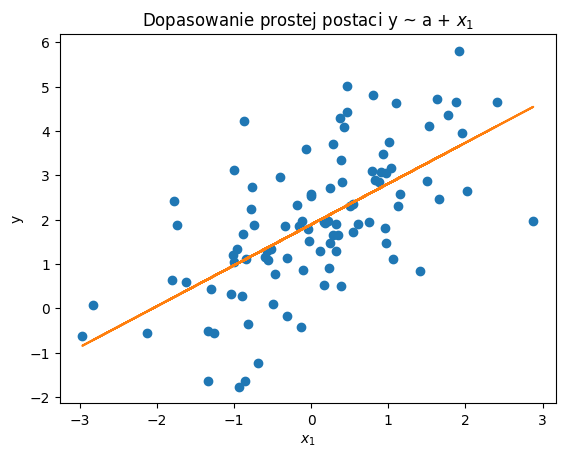

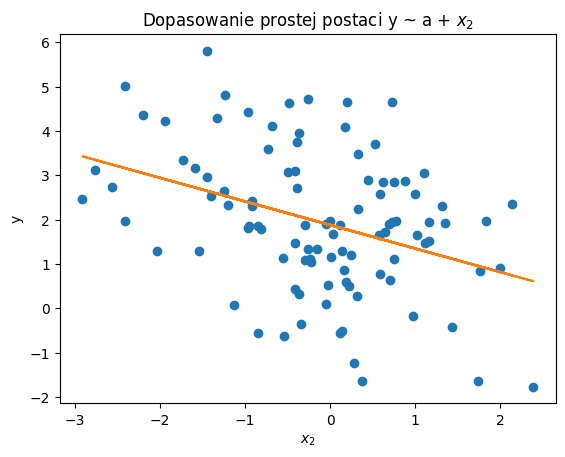

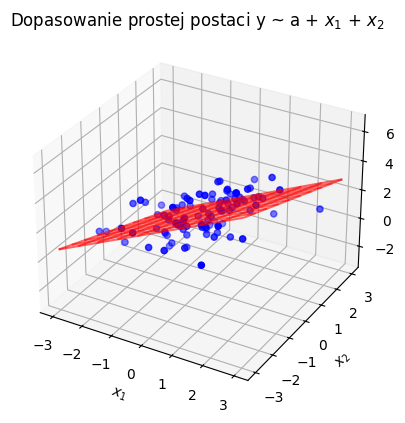

In [ ]:
# ===== Twoja implementacja tutaj =====
x1=np.random.normal(0,1,(100,1))
x2=np.random.normal(0,1,(100,1))
e=np.random.normal(0,1,(100,1))

y=2+x1-0.5*x2+e
ones = np.ones([100, 1])

Z1=np.concatenate([ones,x1],1)
Z2=np.concatenate([ones,x2],1)
Z3=np.concatenate([ones,x1,x2],1)
Z4=np.concatenate([ones,x1,x2,x1*x2],1)

#y=b0*1+b1*x1
Q,R=np.linalg.qr(Z1)
Qt=np.transpose(Q)
b=sp.linalg.solve_triangular(R,Qt.dot(y))

Y1=b[0]+b[1]*x1
norm1 = residual_norm(Z1, b, y)
blad=[]
for i in range(len(x1)):
    blad.append(y[i]-Y1[i])

print("-------------------------------")
print("Wyniki dla modelu 1")
print("Blad wyniosi: ",norm1)

plt.figure()
plt.plot(x1,y,'o')
plt.plot(x1,Y1)
plt.title('Dopasowanie prostej postaci y ~ a + $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('y')

#y=b0*1+b1*x2
Q,R=np.linalg.qr(Z2)
Qt=np.transpose(Q)
b=sp.linalg.solve_triangular(R,Qt.dot(y))

Y2=b[0]+b[1]*x2
norm2 = residual_norm(Z2, b, y)

blad=[]
for i in range(len(x1)):
    blad.append(y[i]-Y2[i])

print("-------------------------------")
print("Wyniki dla modelu 2")
print("Blad wyniosi: ",norm2)

plt.figure()
plt.plot(x2,y,'o')
plt.plot(x2,Y2)
plt.title('Dopasowanie prostej postaci y ~ a + $x_2$')
plt.xlabel('$x_2$')
plt.ylabel('y')

#y=b0*1+b1*x1+b2*x2
Q,R=np.linalg.qr(Z3)
Qt=np.transpose(Q)
b=sp.linalg.solve_triangular(R,Qt.dot(y))
X1_ax, X2_ax = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))

Y3 = b[0] + b[1] * X1_ax + b[2] * X2_ax
norm3 = residual_norm(Z3, b, y)

blad=[]
for i in range(len(x1)):
    blad.append(y[i]-b[0]-b[1]*x1[i]-b[2]*x2[i])

print("-------------------------------")
print("Wyniki dla modelu 3")
print("Blad wyniosi: ",norm3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='b', label='punkty')
ax.plot_wireframe(X1_ax, X2_ax, Y3, color='r', alpha=0.6)
plt.title('Dopasowanie prostej postaci y ~ a + $x_1$ + $x_2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')

#y=b0*1+b1*x1+b2*x2+b3*x1x2
Q,R=np.linalg.qr(Z4)
Qt=np.transpose(Q)
b=sp.linalg.solve_triangular(R,Qt.dot(y))


Y4 = b[0] + b[1] * X1_ax + b[2] * X2_ax+b[3]*X1_ax*X2_ax
norm4 = residual_norm(Z4, b, y)

blad=[]
for i in range(len(x1)):
    blad.append(y[i]-b[0]-b[1]*x1[i]-b[2]*x2[i]-b[3]*x1[i]*x2[i])
print("-------------------------------")
print("Wyniki dla modelu 4")
print("Blad wyniosi: ",norm4)

***Analiza i wykonanie zad.4***

Zadanie polegalo na zamodelowaniu procesu opisanego funkcja y, dwoch zmiennych $x_1, x_2$ oraz zaklocen $\epsilon$. Najpierw tworzymy wektory przy użyciu funkcji *np.random.normal()* generując wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich ma średnią równą $0$ oraz odchylenie standardowye równye $1$.  Wartośc wektora $y$ obliczymy jako $
y = 2 + x_1 - 0.5x_2 + \epsilon$.  W analizowanym modelu równanie regresji zapisujemy jako $ \mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + \dots + b_n \mathbf{z}_n,$ gdzie $\mathbf{y}$ to wektor wartości wyjściowych, $\mathbf{z}_i$ to zmienne niezależne, $b_0$ to wyraz wolny, a $b_1,\dots,b_n$ określają wpływ zmiennych na wyjście. W formie macierzowej zapisujemy to jako $\mathbf{Z}\mathbf{b} = \mathbf{y},$ gdzie $ \mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, \dots, \mathbf{z}_n] \in \mathbb{R}^{m \times (n+1)}, \quad \mathbf{b} \in \mathbb{R}^{(n+1)\times 1}, \quad \mathbf{y} \in \mathbb{R}^{m \times 1}. $ Wiersze macierzy $\mathbf{Z}$ odpowiadają obserwacjom, a kolumny zmiennym, przy czym pierwsza kolumna odpowiada wyrazowi wolnemu.

Korzystając z funkcji *np.concatenate* łączymy wektor jedynek połączony z odpowiednim wektrem zaleznie od metody ktora bedziemy chcieli dopasowac, tworzac maceirz wspolczynnikow. Metodą 3. z zadania 2. rozwiązujemy układ równań 
$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$

Po wyznaczeniu wektora b, wyznaczamy wartości y uzyskane z naszego dopasowania i porównujemy je z wartościami dokładnymi. Wyznaczając normę residuum i przedstawiając uzyskane dopasowanie na wykresach. Dla przypadków gdzie y zależy od jednej zmiennej rysujemy wykres przy pomocy *plt.plot()*. Dla wykresu gdzie y zależy od dwóhc zmiennych rysujemy wykres 3D. W tym celu najpierw tworzymy siatkę przy pomocy *np.meshgrid*, nastepnie rysujemy punty z danych przy pomocy *scatter* a nasze dopasowanie rysujemy jako płaszczyzne przy pomocy *plot_wireframe*. Z uzyskancyh danych widzimy, że najleszpe dopasowania wykazała metoda 4, a najgorzsze metoda 2.



---

***WNIOSKI***

Na laboratorium poznaliśmy praktyczne zastosowania metod rozwiązywania układów równań liniowych dla macierzy prostokątnych oraz regresji liniowej. Wykazaliśmy, że metoda QR daje najlepszy kompromis między dokładnością a czasem wykonania, ale zastosowanie SVD i lstsq() również daje dobre wyniki. Kluczowym wyzwaniem w regresji jest wybór odpowiedniego modelu. Zbyt prosty model może nie uchwycić wszystkich zależności, podczas gdy zbyt złożony (uwzględniający wszystkie zmienne i interakcje) staje się nadwrażliwy na pojedyncze punkty danych. Dokładne i wiarygodne wyniki zapewnia więc równowaga między dopasowaniem a odpornością, osiągana przez właściwy dobór metody numerycznej

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)